In [17]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

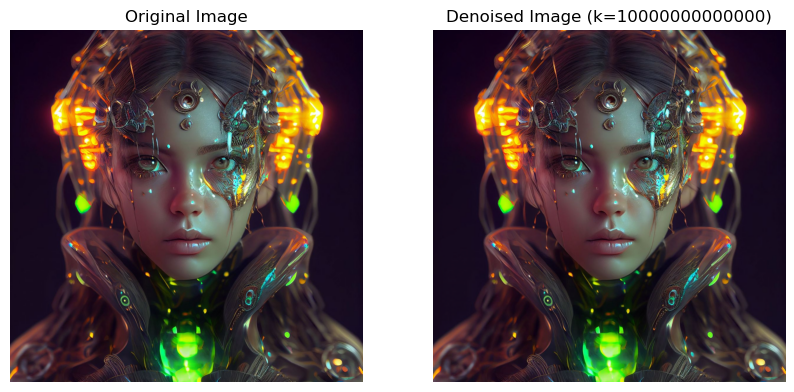

In [18]:
def svd_denoising(image_path, k):
    # Read the image in color
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB for correct visualization

    # Split the image into R, G, B channels
    
    R,G,B = cv2.split(img)


    # Function to apply SVD and reconstruct the image by keeping top-k singular values

    def denoise_channel(channel, k):

        U, S, Vt = np.linalg.svd(channel, full_matrices=False)

        S_k = np.zeros_like(S)

        S_k[:k] = S[:k]  # Keep only the top-k singular values, zeroing out smaller one

        S_k = np.diag(S_k)

        U_k = U[:, :k]

        Vt_k = Vt[:k , :]

        return np.dot(U_k, np.dot(S_k[:k, :k], Vt_k))
    
    # Apply SVD denoising to each channel

    R_denoised = denoise_channel(R,k)
    G_denoised = denoise_channel(G,k)
    B_denoised = denoise_channel(B,k)

    # Stack the denoised channels back into an image

    denoised_img = np.stack([R_denoised, G_denoised, B_denoised], axis=2)

    denoised_img = np.clip(denoised_img, 0, 255).astype(np.uint8)


    # Plot original and denoised images

    fig, axes = plt.subplots(1,2, figsize=(10,5))

    axes[0].imshow(img)

    axes[0].set_title('Original Image')

    axes[0].axis('off')


    axes[1].imshow(denoised_img)

    axes[1].set_title(f'Denoised Image (k={k})')

    axes[1].axis('off')


    plt.show()

# Example usage

image_path = '/Users/Dataghost/Master-X-DL/claude.jpg'

k=50  # Number of singular values to keep for denoising

svd_denoising(image_path, k)

Effect on the Image

If k is large → The image remains close to the original, but some noise is still present.
If k is small → The image loses details, but most noise is removed.

Ideal k selection → Should balance between noise removal and preserving image details.
Example of What Happens Visually

If we take an image and apply SVD denoising:
Original Image (Noisy) → High-frequency noise is visible.
Denoised Image (k = 50) → Noise is significantly reduced, but the main structure is preserved.